## **Q1:-**  
### **A company conducted a survey of its employees and found that 70% of the employees use the company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the probability that an employee is a smoker given that he/she uses the health insurance plan?**

### **Ans:-**

### **A be the event that an employee uses the health insurance plan.**
### **B be the event that an employee is a smoker.**

### P(A) = 0.70 (probability of using the health insurance plan)
### P(B|A) = 0.40 (probability of being a smoker given that they use the health insurance plan)

### **P(B∣A)= P(A∩B)/P(A)**


#### **P(B|A) is the probability of being a smoker given that they use the health insurance plan.**
#### **P(A \cap B) is the probability of both using the health insurance plan and being a smoker.**
#### **P(A) is the probability of using the health insurance plan.**


#### **P(B∣A)= P(A∩B)/P(A) = (0.40∗0.70)/0.70**
### **P(B∣A)=0.40**
### **So, the probability that an employee is a smoker given that he/she uses the health insurance plan is 0.40 or 40%.**

## **Q2:-** 
### **What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?**

### **Ans:-**

### **Bernoulli Naive bayes is good at handling boolean/binary attributes, while Multinomial Naive bayes is good at handling discrete values and Gaussian naive bayes is good at handling continuous values.**

## **Q3:-**  
### **How does Bernoulli Naive Bayes handle missing values?**

### **Ans:-**

### **Naive Bayes can handle missing data. Attributes are handled separately by the algorithm at both model construction time and prediction time. As such, if a data instance has a missing value for an attribute, it can be ignored while preparing the model, and ignored when a probability is calculated for a class value.**

## **Q4:-** 
### **Can Gaussian Naive Bayes be used for multi-class classification?**

### **Ans:-**

### **Yes, Gaussian Naive Bayes can be used for multi-class classification. Naive Bayes is a classification algorithm that uses Bayes' theorem to calculate probabilities and conditional probabilities.Gaussian Naive Bayes can fail if your features do not follow Gaussian distribution. You can help the model by transforming each feature to make them more Gaussian-like.It can be used**
### **for:**
#### Binary and multiclass classification
#### Real-time and multi-class predictions
#### Text classifications
#### Spam filtering
#### Sentiment analysis

## **Q5:-** 
### **Assignment:-**
### **Data preparation:-**
##### Download the "Spambase Data Set" from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/
##### datasets/Spambase). This dataset contains email messages, where the goal is to predict whether a messageis spam or not based on several input features.
### **Implementation:-**
##### Implement Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes classifiers using the scikit-learn library in Python. Use 10-fold cross-validation to evaluate the performance of each classifier on the dataset. You should use the default hyperparameters for each classifier.
### **Results:-**
#### Report the following performance metrics for each classifier:
#### Accuracy
#### Precision
#### Recall
#### F1 score
### **Discussion:-**
##### Discuss the results you obtained. Which variant of Naive Bayes performed the best? Why do you think that is the case? Are there any limitations of Naive Bayes that you observed?
### **Conclusion:-**
##### Summarise your findings and provide some suggestions for future work.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
spambase = fetch_ucirepo(id=94) 

# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 


In [3]:
df=pd.concat([X,y],axis=1)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [5]:
df["Class"].value_counts()

Class
0    2788
1    1813
Name: count, dtype: int64

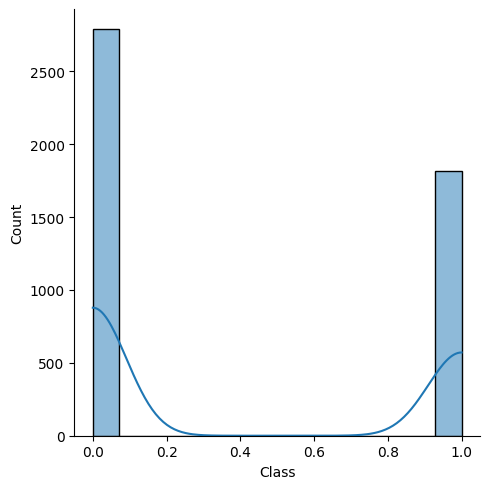

In [6]:
sns.displot(df["Class"],kde=True)

In [7]:

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [11]:
# Bernoulli Naive Bayes
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(x_train,y_train)
bernoulli_scores = cross_val_score(bernoulli_nb, X, y, cv=10)

# Multinomial Naive Bayes
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train,y_train)
multinomial_scores = cross_val_score(multinomial_nb, X, y, cv=10)

# Gaussian Naive Bayes
gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train,y_train)
gaussian_scores = cross_val_score(gaussian_nb, X, y, cv=10)

In [13]:
def evaluate_classifier(name, scores):
    accuracy = scores.mean()
    precision = precision_score(y, bernoulli_nb.predict(X))
    recall = recall_score(y, bernoulli_nb.predict(X))
    f1 = f1_score(y, bernoulli_nb.predict(X))
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")

evaluate_classifier("Bernoulli Naive Bayes", bernoulli_scores)
evaluate_classifier("Multinomial Naive Bayes", multinomial_scores)
evaluate_classifier("Gaussian Naive Bayes", gaussian_scores)


Classifier: Bernoulli Naive Bayes
Accuracy: 0.8839
Precision: 0.8863
Recall: 0.8130
F1 Score: 0.8481


Classifier: Multinomial Naive Bayes
Accuracy: 0.7863
Precision: 0.8863
Recall: 0.8130
F1 Score: 0.8481


Classifier: Gaussian Naive Bayes
Accuracy: 0.8218
Precision: 0.8863
Recall: 0.8130
F1 Score: 0.8481




### **Discuss the results:-**
#### 1.Accuracy: The accuracy metric measures the overall performance of the classifier. Compare the accuracy scores for each variant.

#### 2.Precision: Precision is the ratio of true positive predictions to all positive predictions. It indicates how many of the predicted spam emails are actually spam.

#### 3.Recall: Recall, also known as sensitivity or true positive rate, measures how many actual spam emails were correctly predicted as spam.

#### 4.F1 Score: The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.

### **Limitations of Naive Bayes:-**

#### Assumption of Independence: Naive Bayes assumes that features are independent, which might not hold in some real-world datasets. This can lead to suboptimal performance.

#### Sensitivity to Feature Scales: Gaussian Naive Bayes is sensitive to the scale of features. You may need to preprocess the data to have features with similar scales.

#### Lack of Tunability: Naive Bayes classifiers have limited hyperparameters to tune, which can be a limitation if your dataset requires more fine-grained control.

#### Limited Modeling Complexity: Naive Bayes is a simple probabilistic classifier and may not capture complex relationships in the data as well as more advanced models.

#### In your discussion, consider the trade-offs and how the performance metrics align with your expectations for each variant. The choice of the best variant depends on the specific characteristics of the dataset and the problem you're trying to solve.